In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.base import BaseEstimator, ClassifierMixin


df = pd.read_excel("ML_Testing.xlsx")

df = df.drop(columns=["Date"])
df = df.dropna(subset=["customer_segment"])


df = df.fillna("Unknown")

X = df[["businessindustrytype", "Amount"]]
y = df["customer_segment"]


X = pd.get_dummies(X)

In [2]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [3]:
class MyKNN(BaseEstimator, ClassifierMixin):
    def __init__(self, n_neighbors=3):
        self.k = n_neighbors

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        return self

    def predict(self, X):
        X = np.array(X)
        y_pred = []
        for x in X:
            distances = np.sqrt(((self.X_train - x) ** 2).sum(axis=1))
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y_train[k_indices]
            label = Counter(k_nearest_labels).most_common(1)[0][0]
            y_pred.append(label)
        return np.array(y_pred)

In [4]:
models = {
    "KNeighborsClassifier (sklearn)": KNeighborsClassifier(n_neighbors=3),
    "MyKNN (scratch)": MyKNN(n_neighbors=3),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "SVM": SVC()
}

In [5]:
results = []


In [6]:
for name, model in models.items():
   
    if name == "MyKNN (scratch)":
        pipe = Pipeline([
            ('clf', model)
        ])
    else:
        pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('clf', model)
        ])
    try:
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.append((name, acc))
        print(f"{name}: {acc:.4f}")
    except Exception as e:
        print(f"❌ Error with {name}: {e}")

KNeighborsClassifier (sklearn): 0.6223
❌ Error with MyKNN (scratch): loop of ufunc does not support argument 0 of type float which has no callable sqrt method
DecisionTree: 0.5940
RandomForest: 0.5958
SVM: 0.1623


Text(0.5, 1.0, 'Model Accuracy Comparison')

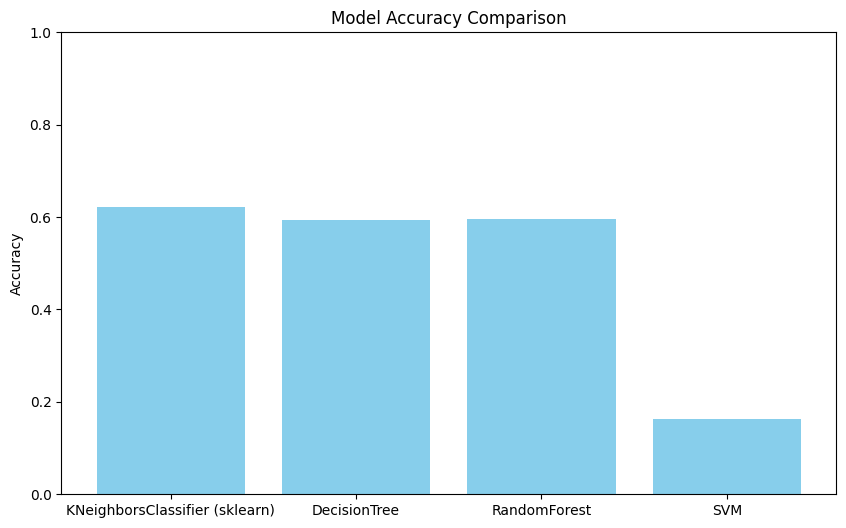

In [7]:
model_names = [x[0] for x in results]
accuracies = [x[1] for x in results]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color='skyblue')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

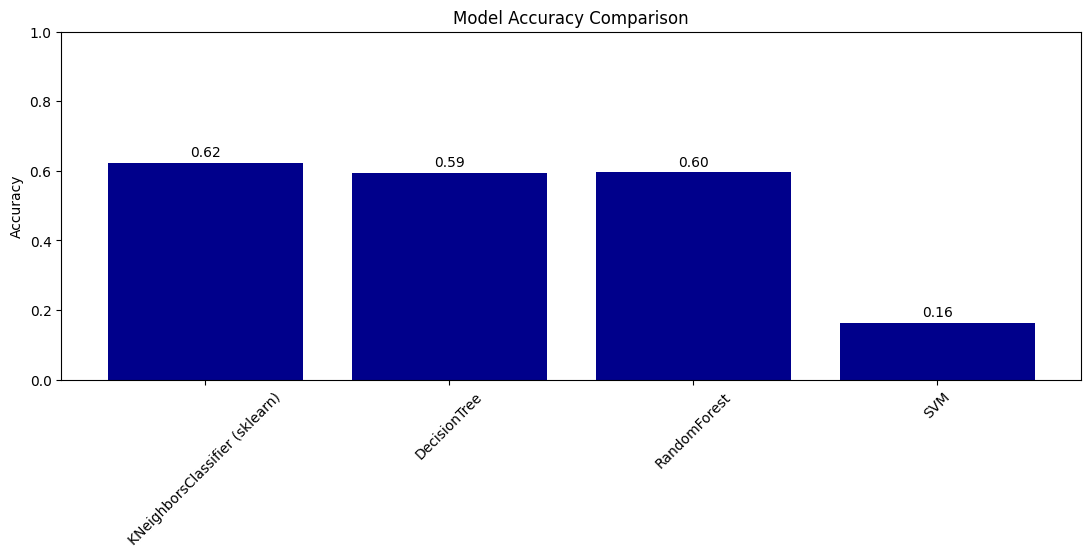

In [10]:
plt.figure(figsize=(12, 6))  

bars = plt.bar(model_names, accuracies, color='darkblue')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01,
             f'{height:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45)

plt.subplots_adjust(left=0.1, right=0.95, bottom=0.3)
plt.show()
